In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

Using TensorFlow backend.


In [2]:
LABELS = [0, 1]

In [8]:
df_cat1 = pd.read_csv("C:/Users/BB-8/Desktop/algo8/HUL/data/lamp_cat1_merged.csv",index_col='index')

In [9]:
df_cat1.head()

,Unnamed: 0,Line_12_Current_L4,Line_12_Temp_L4,Line_12_Velocity,Line_12_Current_L4_event,Line_12_Current_L4_W5_mean,Line_12_Temp_L4_W5_mean,Line_12_Velocity_W5_mean,Line_12_Current_L4_W5_stdev,Line_12_Temp_L4_W5_stdev,Line_12_Velocity_W5_stdev,Line_12_Current_L4_W10_mean,Line_12_Temp_L4_W10_mean,Line_12_Velocity_W10_mean,Line_12_Current_L4_W10_stdev,Line_12_Temp_L4_W10_stdev,Line_12_Velocity_W10_stdev
index,,,,,,,,,,,,,,,,,
2018-12-02 00:04:00,0,11.0,84.0,7.0,0.0,11.0,84.00,7.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-02 00:05:00,1,11.0,83.0,7.0,0.0,11.0,84.00,7.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-02 00:06:00,2,11.0,84.0,7.0,0.0,11.0,83.75,7.0,0.0,0.433013,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-02 00:07:00,3,11.0,84.0,7.0,0.0,11.0,83.75,7.0,0.0,0.433013,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-02 00:08:00,4,11.0,84.0,7.0,0.0,11.0,83.75,7.0,0.0,0.433013,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_cat1['Line_12_Current_L4_event'].replace(2,1,inplace=True)

In [43]:
df_cat1['Line_12_Current_L4_event'].value_counts()

0.0    1489478
1.0         33
Name: Line_12_Current_L4_event, dtype: int64

In [44]:
df_cat1.index[-1]

'2019-03-11 06:59:00'

In [45]:
df_cat1.shape

(1489511, 17)

In [46]:
df_cat1.isnull().values.any()

True

Text(0,0.5,'Frequency')

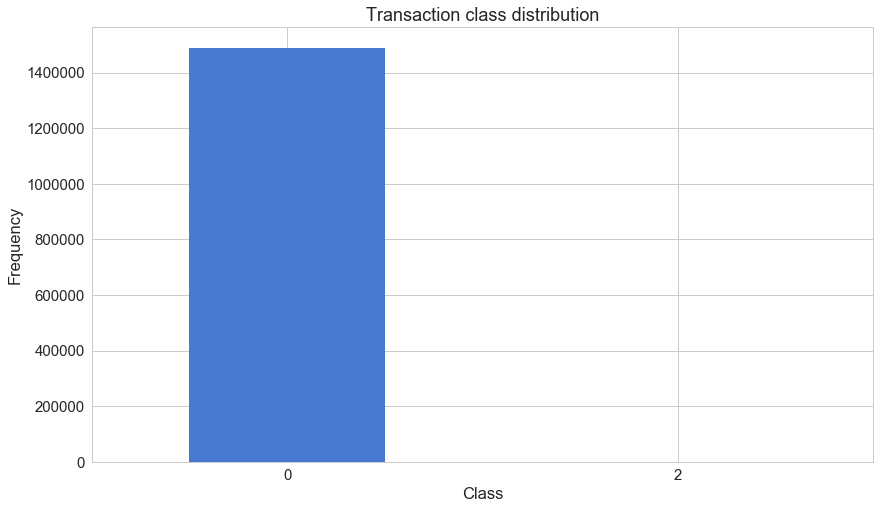

In [47]:
count_classes = pd.value_counts(df_cat1['Line_12_Current_L4_event'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [48]:
df_cat1['Line_12_Current_L4'] = df_cat1['Line_12_Current_L4'].fillna(0).astype(int)

In [50]:
df_cat1['Line_12_Current_L4'].isnull().any()

False

In [51]:
fault = df_cat1[df_cat1['Line_12_Current_L4_event'] == 1]
normal = df_cat1[df_cat1['Line_12_Current_L4_event'] == 0]

In [52]:
fault.shape

(33, 17)

In [53]:
normal.shape

(1489478, 17)

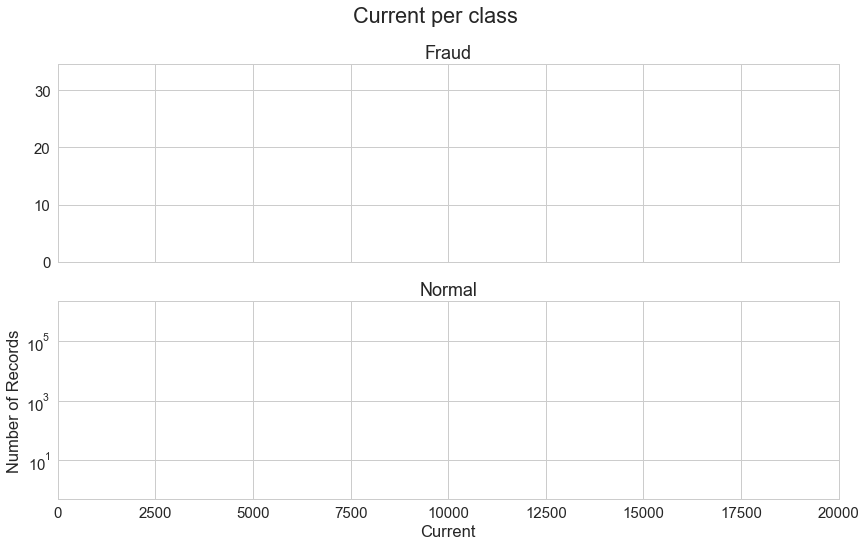

In [54]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Current per class')

bins = 50

ax1.hist(fault['Line_12_Current_L4'], bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal['Line_12_Current_L4'].replace(np.nan, 0), bins = bins)

ax2.set_title('Normal')

plt.xlabel('Current')
plt.ylabel('Number of Records')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fault.index, fault['Line_12_Current_L4'])
ax1.set_title('Fraud')

ax2.scatter(normal.index, normal['Line_12_Current_L4'])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

KeyboardInterrupt: 

In [137]:
from sklearn.preprocessing import StandardScaler
#data = df.drop(['Time'], axis=1)
data = df_cat1.fillna(0).astype(int)
data['Line_12_Current_L4'] = StandardScaler().fit_transform(data['Line_12_Current_L4'].values.reshape(-1, 1))

C:\Users\BB-8\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [138]:
#data = data.take(np.random.permutation(len(data))[:500000])
d = data[data['Line_12_Current_L4_event']==0]
data_0=d.take(np.random.permutation(len(d))[:500000])


In [139]:
data = data_0.append(data[data['Line_12_Current_L4_event']==1])

In [186]:
data.shape

(500033, 17)

In [141]:
len(data[data['Line_12_Current_L4_event'] == 1])

33

In [142]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train['Line_12_Current_L4_event'] == 0]
X_train = X_train.drop(['Line_12_Current_L4_event'], axis=1)
y_test = X_test['Line_12_Current_L4_event']
X_test = X_test.drop(['Line_12_Current_L4_event'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(399999, 16)

In [194]:
y_test = data
#y_test = data.take(np.random.permutation(len(data))[:int(len(data)*0.2)])
y_test = y_test[y_test['Line_12_Current_L4_event'] == 1]['Line_12_Current_L4_event']

In [143]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [162]:
nb_epoch = 5000
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0,
                              mode='auto',
                              baseline=None)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard,early_stop]).history

Train on 399999 samples, validate on 100007 samples
Epoch 1/5000
399999/399999 [==============================] - 29s 72us/step - loss: 246269672.3624 - acc: 0.9995 - val_loss: 246678320.4061 - val_acc: 0.9994
Epoch 2/5000
399999/399999 [==============================] - 17s 42us/step - loss: 245633736.1672 - acc: 0.9995 - val_loss: 246049630.9455 - val_acc: 0.9994
Epoch 3/5000
399999/399999 [==============================] - 17s 43us/step - loss: 245000595.4185 - acc: 0.9995 - val_loss: 245411283.6359 - val_acc: 0.9994
Epoch 4/5000
399999/399999 [==============================] - 16s 39us/step - loss: 244363537.3710 - acc: 0.9995 - val_loss: 244766426.9064 - val_acc: 0.9994
Epoch 5/5000
399999/399999 [==============================] - 16s 39us/step - loss: 243733472.2862 - acc: 0.9995 - val_loss: 244132581.5495 - val_acc: 0.9994
Epoch 6/5000
399999/399999 [==============================] - 17s 42us/step - loss: 243095940.9008 - acc: 0.9995 - val_loss: 243501126.8938 - val_acc: 0.9994


399999/399999 [==============================] - 16s 39us/step - loss: 215214990.5185 - acc: 0.9995 - val_loss: 215624095.9704 - val_acc: 0.9994
Epoch 53/5000
399999/399999 [==============================] - 16s 39us/step - loss: 214630200.4356 - acc: 0.9995 - val_loss: 214988225.8256 - val_acc: 0.9994
Epoch 54/5000
399999/399999 [==============================] - 16s 39us/step - loss: 214021735.4582 - acc: 0.9995 - val_loss: 214439734.5015 - val_acc: 0.9994
Epoch 55/5000
399999/399999 [==============================] - 15s 39us/step - loss: 213440512.5380 - acc: 0.9995 - val_loss: 213831272.5736 - val_acc: 0.9994
Epoch 56/5000
399999/399999 [==============================] - 16s 40us/step - loss: 212896724.0626 - acc: 0.9995 - val_loss: 213273776.4969 - val_acc: 0.9994
Epoch 57/5000
399999/399999 [==============================] - 16s 39us/step - loss: 212397492.0291 - acc: 0.9995 - val_loss: 212676491.7229 - val_acc: 0.9994
Epoch 58/5000
399999/399999 [==============================]

In [145]:
autoencoder = load_model('model.h5')

In [70]:
y_pred = autoencoder.predict(X_test)

In [73]:
y_pred.shape

(297903, 16)

In [71]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

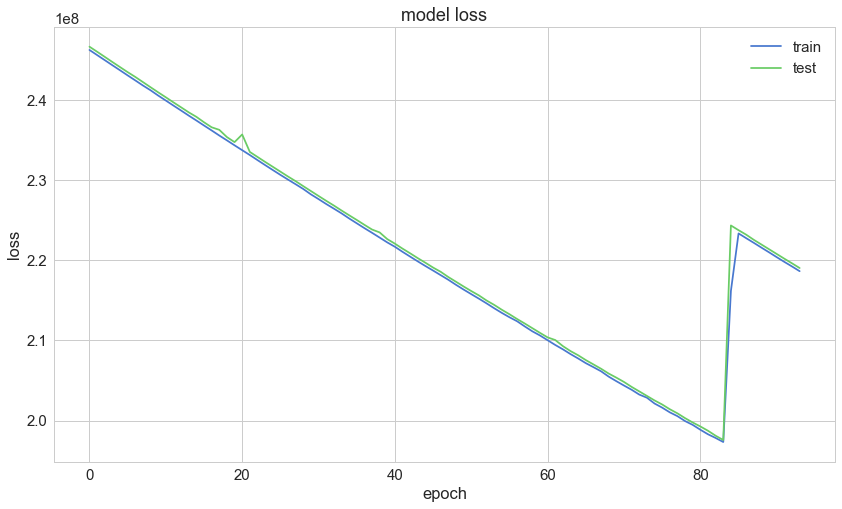

In [163]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

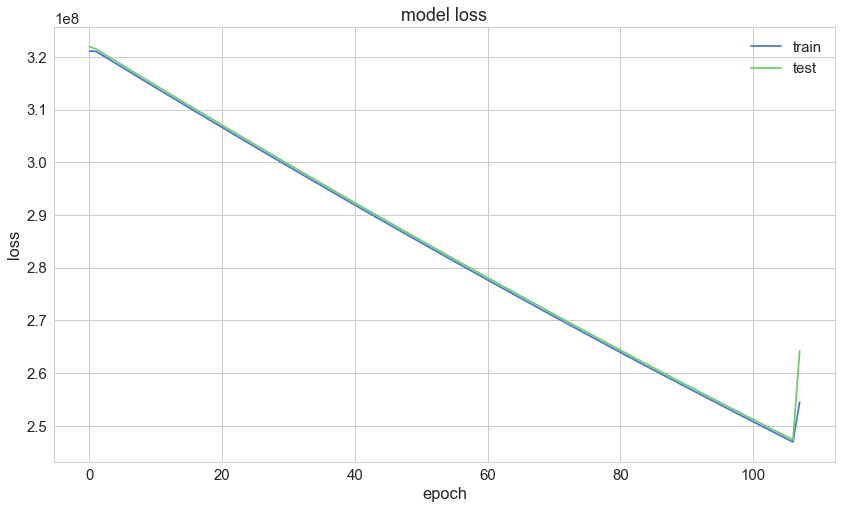

In [146]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [197]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

ValueError: array length 100007 does not match index length 33

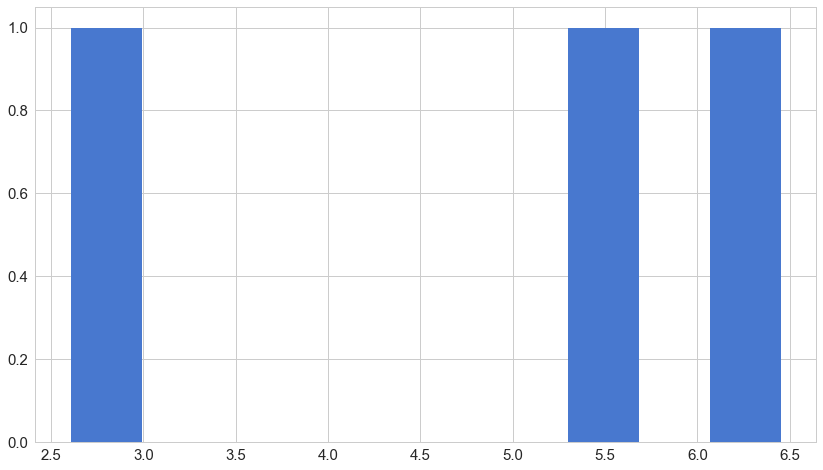

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

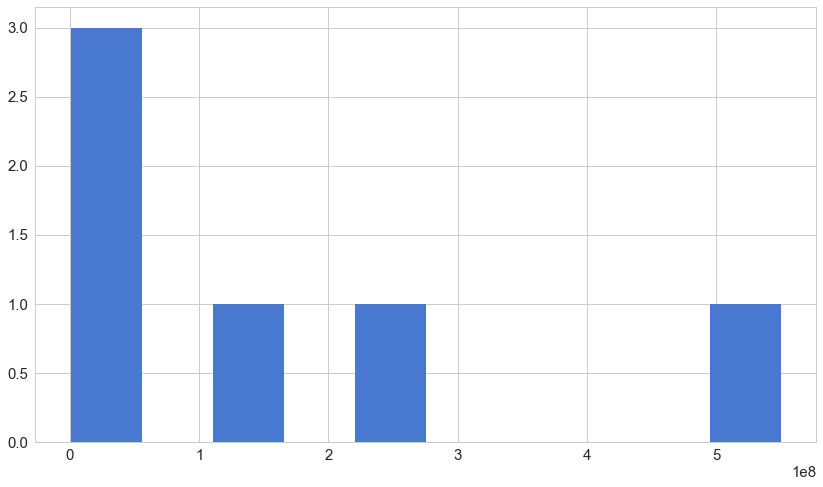

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [152]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

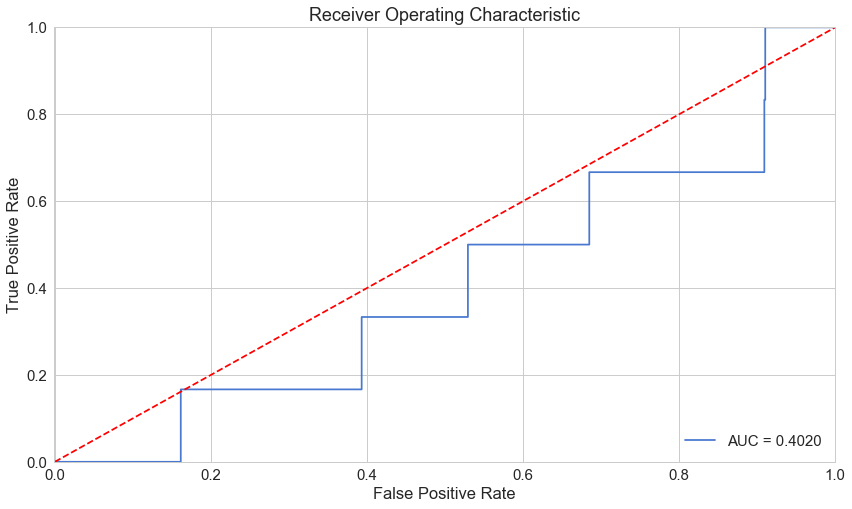

In [153]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

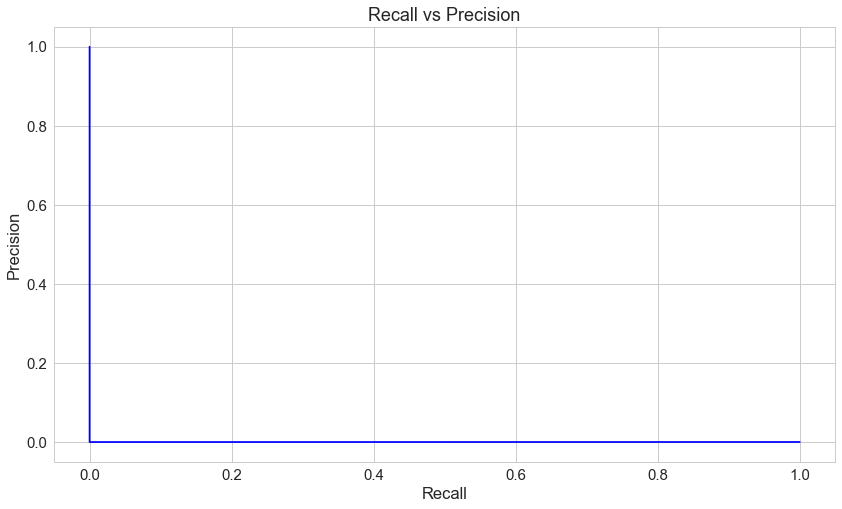

In [154]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

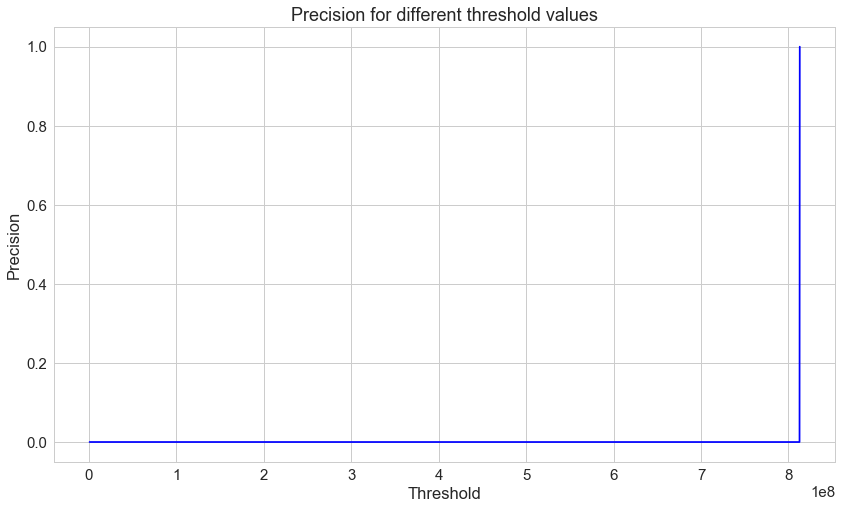

In [155]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

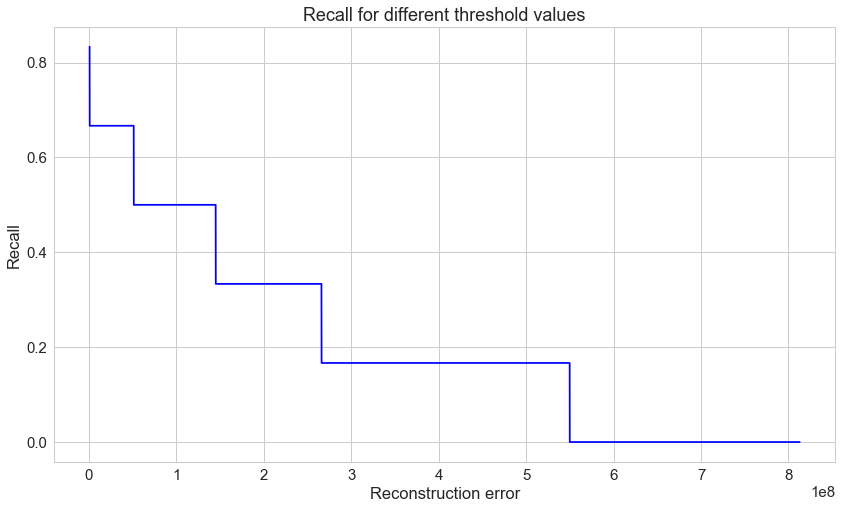

In [156]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [208]:
import matplotlib
matplotlib.use('GTKAgg') 

C:\Users\BB-8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\BB-8\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\BB-8\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\BB-8\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\BB-8\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\BB-8\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\B

In [ ]:
print("fff")

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= 1 if name == 1 else "Normal")
print("Done")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
print("Done")
ax.legend()
print("Done")
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")


Done
Done


Text(0.5,0,'Data point index')

In [ ]:
plt.show()

In [178]:
threshold = 5000

In [179]:
LABELS = [0,1]

In [195]:
y_test.value_counts()

1    33
Name: Line_12_Current_L4_event, dtype: int64

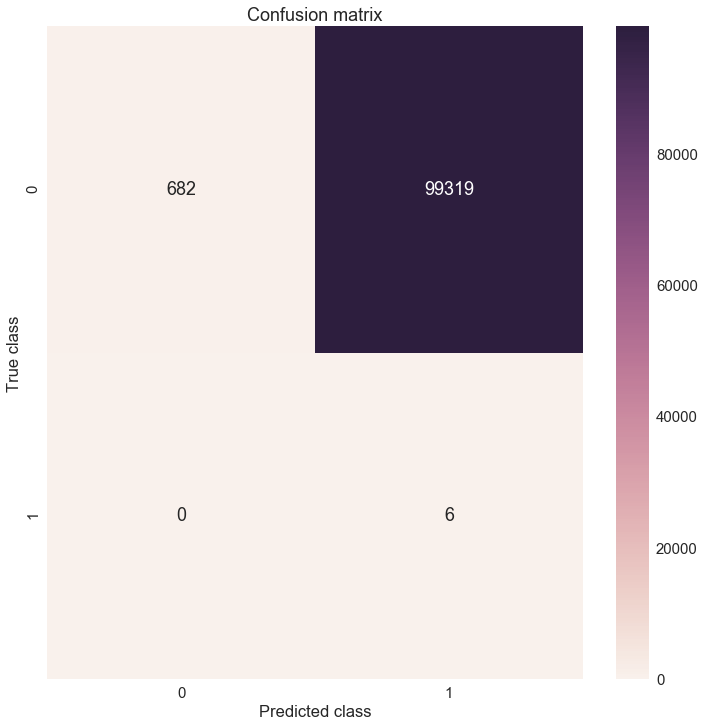

In [196]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [203]:
y_test.value_counts()

1    33
Name: Line_12_Current_L4_event, dtype: int64

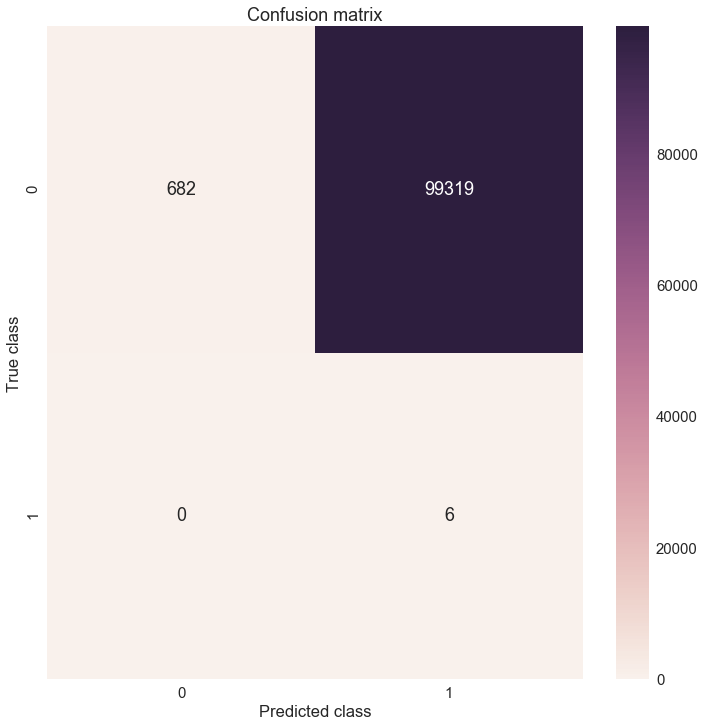

In [180]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [204]:
from sklearn.metrics import classification_report
target_names = ["0","1"]
print(classification_report(error_df.true_class,y_pred,target_names))

             precision    recall  f1-score   support

          0       1.00      0.01      0.01    100001
          1       0.00      1.00      0.00         6

avg / total       1.00      0.01      0.01    100007



C:\Users\BB-8\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:468: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


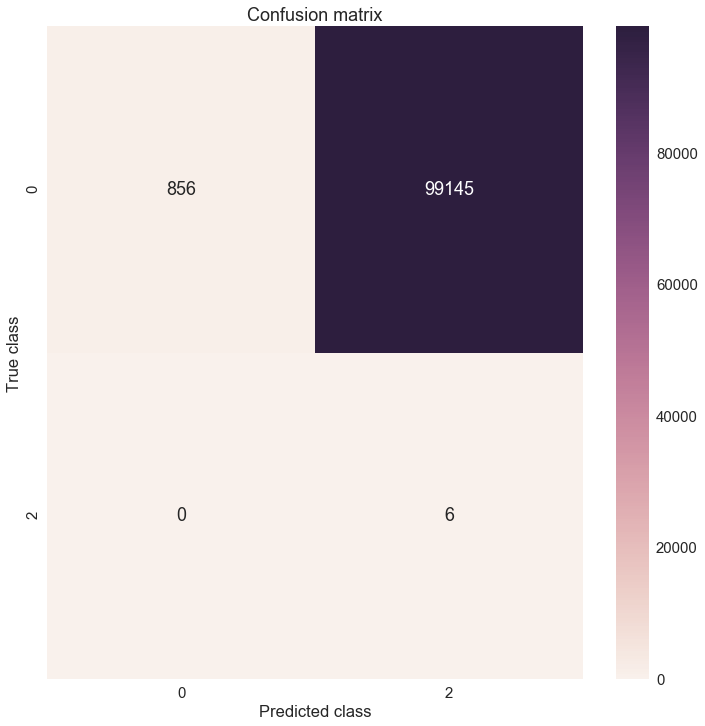

In [160]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()